In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Downloads/Kaggle Dataset/House_Price.csv')

In [56]:
test = pd.read_csv('Downloads/Kaggle Dataset/House_Price_test.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df.columns[df.isnull().sum()>1]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [5]:
Missing_Values = pd.DataFrame(df.isnull().sum(), columns=['Count'])
Missing_Values = Missing_Values[Missing_Values['Count']>1]

In [6]:
Missing_Values.sort_values(by='Count',ascending = False)

,Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


**Null Values Present in above DataFrame indicates that particular features is not present**  For example: **Null value in PoolQc** indicates that **particular house dont have a Pool**

Filling Null Values of **'Alley','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'** with **'NA'**as categorical Feature

In [21]:
Fill_Lst = [ 'Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
            'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [26]:
for i in range(0,len(Fill_Lst)):
    df[f'{Fill_Lst[i]}'].fillna('NA', inplace = True)

In [28]:
df.columns[df.isnull().sum()>1]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea'], dtype='object')

**'MasVnrType', 'MasVnrArea'**

In [31]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [32]:
df['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Replacing Null Values of both **'MasVnrType' & 'MasVnrArea'** with thier mode

In [33]:
df['MasVnrType'].fillna('None', inplace = True)
df['MasVnrArea'].fillna(0, inplace=True)

In [34]:
df.columns[df.isnull().sum()>1]

Index(['LotFrontage'], dtype='object')

<AxesSubplot:xlabel='Street', ylabel='LotFrontage'>

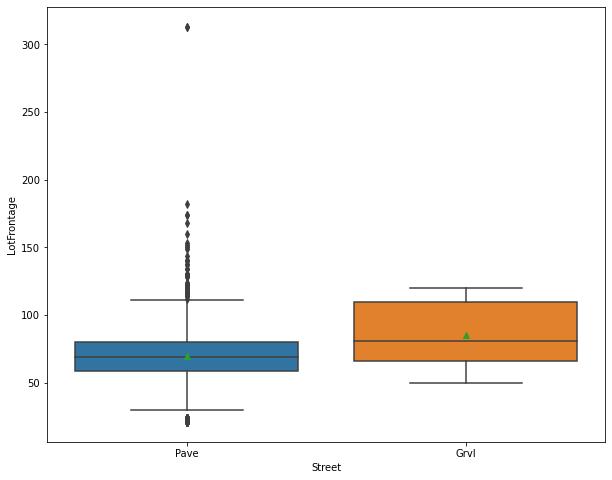

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['Street'], y=df['LotFrontage'], showmeans = True)


In [37]:
df.groupby(by='Street')['LotFrontage'].mean()

Street
Grvl    85.400000
Pave    69.985786
Name: LotFrontage, dtype: float64

In [38]:
def Lot_Frontage(col):
    Lot_Frontage = col[0]
    Street = col[1]
    if pd.isnull(Lot_Frontage):
        if Street == 'Grvl':
            return 85
        elif Street == 'Pave':
            return 70
        else :
            return 0
    else:
        return Lot_Frontage
        

In [39]:
df['LotFrontage'] = df[['LotFrontage','Street']].apply(Lot_Frontage,axis=1)

**One Hot Encoding**

In [96]:
Final_df = pd.concat([df,test], axis = 0)

In [97]:
Final_df.shape

(2919, 81)

In [98]:
Final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [99]:
Lst_Categorical = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
                   'LandSlope','Neighborhood','Condition2','BldgType','Condition1',
                   'HouseStyle','SaleType','SaleCondition','ExterCond',
                   'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure',
                   'BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl','Exterior1st',
                   'Exterior2nd','MasVnrType','Heating','HeatingQC','CentralAir',
                   'Electrical','KitchenQual','Functional',
                   'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Alley',
                   'MiscFeature','Fence','PoolQC']

In [101]:
len(Lst_Categorical)

43

In [102]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final
    

In [104]:
final_df=category_onehot_multcols(Lst_Categorical)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Alley
MiscFeature
Fence
PoolQC


In [106]:
final_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Othr,Shed,TenC,GdWo,MnPrv,MnWw,NA,Fa,Gd,NA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,0,0,1,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,0,0,1,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,0,0,1,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,0,0,1,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,0,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,1,0,0,1,0,0,0,0,0


In [107]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [108]:
df_Train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Othr,Shed,TenC,GdWo,MnPrv,MnWw,NA,Fa,Gd,NA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,0,0,1,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,0,0,1,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,0,0,1,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,0,0,1,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,60,70.0,16545,8,5,1998,1998,731.0,781.0,...,0,0,0,0,0,0,1,0,0,1
1418,1419,20,71.0,9204,5,5,1963,1963,0.0,25.0,...,0,0,0,0,0,0,1,0,0,1
1419,1420,20,70.0,16381,6,5,1969,1969,312.0,1110.0,...,0,0,0,0,0,0,1,0,0,1
1420,1421,60,90.0,11700,6,6,1968,1968,420.0,404.0,...,0,0,0,0,0,0,1,0,0,1
